Employee Attrition Prediction

* To build a predictive model for employee attrition using various machine learning techniques
* Data exploration, cleaning, and preprocessing
* To identify the employess at the risk of leaving, the factors analyzed are job satisfaction, promotion history, and work environment

Dataset. --  IBM HR DATASET
https://www.kaggle.com/datasets/rushikeshghate/capstone-projectibm-employee-attrition-prediction

In [257]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Luminar_Projects/main_project_ML/archive (1)/IBM HR Data new.csv')
df.shape

<ipython-input-257-d181dce251eb>:4: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Luminar_Projects/main_project_ML/archive (1)/IBM HR Data new.csv')


(23436, 37)

In [258]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [259]:
df.isnull().sum()

,0
Age,3
Attrition,13
BusinessTravel,8
DailyRate,12
Department,11
DistanceFromHome,9
Education,12
EducationField,9
EmployeeCount,5
EmployeeNumber,1


In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,13.681777,1186.544372,1.0,2.0,3.0,4.0,129588.0
JobInvolvement,23427.0,2.733811,0.836860,1.0,2.0,3.0,3.0,54.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,3.887779,155.332904,0.0,1.0,2.0,4.0,23258.0
PerformanceRating,23426.0,3.155852,0.371215,3.0,3.0,3.0,3.0,13.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


In [261]:
df.loc[(df.EnvironmentSatisfaction>df.EnvironmentSatisfaction.quantile(0.9))]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,...,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,...,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [262]:
df['EnvironmentSatisfaction'].value_counts()

,count
EnvironmentSatisfaction,
3.0,7196
4.0,7110
1.0,4580
2.0,4539
127249.0,1
129588.0,1


In [263]:
df.loc[(df.NumCompaniesWorked>10)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,...,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,...,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [264]:
a=df['NumCompaniesWorked'].value_counts()
a

,count
NumCompaniesWorked,
1.0,8311
0.0,3176
3.0,2508
2.0,2330
4.0,2208
7.0,1171
6.0,1108
5.0,1002
9.0,818


In [265]:
df['PerformanceRating'].value_counts()

,count
PerformanceRating,
3.0,19791
4.0,3633
11.0,1
13.0,1


In [266]:
df.loc[(df.PerformanceRating>4)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,...,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,...,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [267]:
df['JobInvolvement'].value_counts()

,count
JobInvolvement,
3.0,13853
2.0,5973
4.0,2280
1.0,1319
47.0,1
54.0,1


In [268]:
df.loc[(df.JobInvolvement>5)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,...,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,...,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [269]:
y = df.NumCompaniesWorked.quantile(0.9)
print(y)

def capping(x):
    if x > y:
        return y
    return x


df['NumCompaniesWorked'] = df['NumCompaniesWorked'].apply(capping)

b=df['NumCompaniesWorked'].value_counts()

print(df['NumCompaniesWorked'].value_counts(),a)

7.0
NumCompaniesWorked
1.0    8311
0.0    3176
7.0    2784
3.0    2508
2.0    2330
4.0    2208
6.0    1108
5.0    1002
Name: count, dtype: int64 NumCompaniesWorked
1.0        8311
0.0        3176
3.0        2508
2.0        2330
4.0        2208
7.0        1171
6.0        1108
5.0        1002
9.0         818
8.0         793
4933.0        1
23258.0       1
Name: count, dtype: int64


In [270]:
a

,count
NumCompaniesWorked,
1.0,8311
0.0,3176
3.0,2508
2.0,2330
4.0,2208
7.0,1171
6.0,1108
5.0,1002
9.0,818


In [271]:
b

,count
NumCompaniesWorked,
1.0,8311
0.0,3176
7.0,2784
3.0,2508
2.0,2330
4.0,2208
6.0,1108
5.0,1002


In [272]:
df1 = pd.DataFrame(columns=["Before Capping", "After Capping"])
df1["Before Capping"] = a
df1["After Capping"] = b

df1


,Before Capping,After Capping
NumCompaniesWorked,,
1.0,8311,8311.0
0.0,3176,3176.0
3.0,2508,2508.0
2.0,2330,2330.0
4.0,2208,2208.0
7.0,1171,2784.0
6.0,1108,1108.0
5.0,1002,1002.0
9.0,818,NaN


In [273]:
df2=df1.sort_values(by=["NumCompaniesWorked"], inplace=False)
print(df2)

                    Before Capping  After Capping
NumCompaniesWorked                               
0.0                           3176         3176.0
1.0                           8311         8311.0
2.0                           2330         2330.0
3.0                           2508         2508.0
4.0                           2208         2208.0
5.0                           1002         1002.0
6.0                           1108         1108.0
7.0                           1171         2784.0
8.0                            793            NaN
9.0                            818            NaN
4933.0                           1            NaN
23258.0                          1            NaN


In [274]:
a1=df['EnvironmentSatisfaction'].value_counts()
a1

,count
EnvironmentSatisfaction,
3.0,7196
4.0,7110
1.0,4580
2.0,4539
127249.0,1
129588.0,1


In [275]:
y = df.EnvironmentSatisfaction.quantile(0.9)
print(y)
def capping(x):

    if x > y:
        x=y
    return x
df.EnvironmentSatisfaction=df.EnvironmentSatisfaction.apply(capping)
b1=df.EnvironmentSatisfaction.value_counts()

4.0


In [276]:
b1

,count
EnvironmentSatisfaction,
3.0,7196
4.0,7112
1.0,4580
2.0,4539


In [277]:
df_env=pd.DataFrame(columns=["BeforeCapping","AfterCapping"])
df_env["BeforeCapping"]=a1
df_env["AfterCapping"]=b1

df_env

,BeforeCapping,AfterCapping
EnvironmentSatisfaction,,
3.0,7196,7196.0
4.0,7110,7112.0
1.0,4580,4580.0
2.0,4539,4539.0
127249.0,1,NaN
129588.0,1,NaN


In [278]:
a2=df['PerformanceRating'].value_counts()
a2

,count
PerformanceRating,
3.0,19791
4.0,3633
11.0,1
13.0,1


In [279]:
y = df.PerformanceRating.quantile(0.9)
def capping(x):

    if x > y:
        x=y
    return x
df.PerformanceRating=df.PerformanceRating.apply(capping)
b2=df.PerformanceRating.value_counts()
b2

,count
PerformanceRating,
3.0,19791
4.0,3635


In [280]:
df_perf=pd.DataFrame(columns=["BeforeCapping","AfterCappping"])
df_perf["BeforeCapping"]=a1
df_perf["AfterCappping"]=b1

df_perf

,BeforeCapping,AfterCappping
EnvironmentSatisfaction,,
3.0,7196,7196.0
4.0,7110,7112.0
1.0,4580,4580.0
2.0,4539,4539.0
127249.0,1,NaN
129588.0,1,NaN


In [281]:
df_perf.sort_values(by=["EnvironmentSatisfaction"],inplace=True)
df_perf

,BeforeCapping,AfterCappping
EnvironmentSatisfaction,,
1.0,4580,4580.0
2.0,4539,4539.0
3.0,7196,7196.0
4.0,7110,7112.0
127249.0,1,NaN
129588.0,1,NaN


In [282]:
a_job=df.JobInvolvement.value_counts()
a_job

,count
JobInvolvement,
3.0,13853
2.0,5973
4.0,2280
1.0,1319
47.0,1
54.0,1


In [283]:
y = df.JobInvolvement.quantile(0.9)
print(y)

def capping(x):
    if x > y:
        x=y
    return x
df.JobInvolvement=df.JobInvolvement.apply(capping)

b_job=df.JobInvolvement.value_counts()
b_job

3.0


,count
JobInvolvement,
3.0,16135
2.0,5973
1.0,1319


In [284]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,2.718829,1.095596,1.0,2.0,3.0,4.0,4.0
JobInvolvement,23427.0,2.632433,0.587436,1.0,2.0,3.0,3.0,3.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,2.581338,2.270676,0.0,1.0,2.0,4.0,7.0
PerformanceRating,23426.0,3.155169,0.362074,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


<Axes: ylabel='NumCompaniesWorked'>

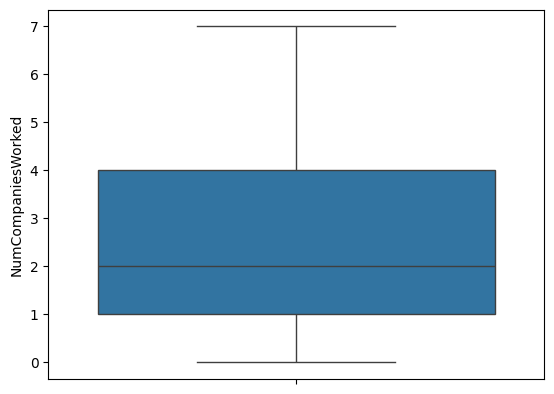

In [285]:
import seaborn as sns
sns.boxplot(df['NumCompaniesWorked'])

<Axes: ylabel='EnvironmentSatisfaction'>

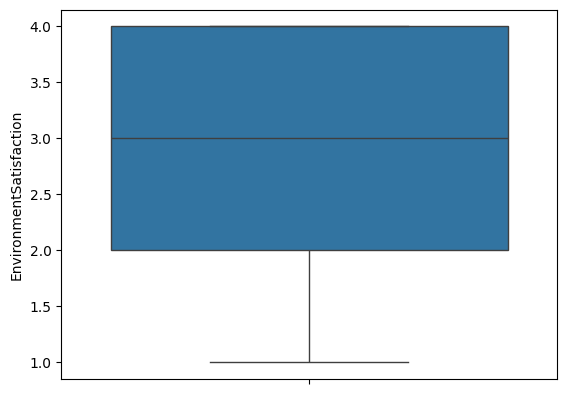

In [286]:
sns.boxplot(df['EnvironmentSatisfaction'])

In [287]:
df_copy=df.copy(deep=True)
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,2.718829,1.095596,1.0,2.0,3.0,4.0,4.0
JobInvolvement,23427.0,2.632433,0.587436,1.0,2.0,3.0,3.0,3.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,2.581338,2.270676,0.0,1.0,2.0,4.0,7.0
PerformanceRating,23426.0,3.155169,0.362074,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


In [288]:
df.shape

(23436, 37)

In [289]:
df_copy.shape

(23436, 37)

In [290]:
df.isnull().sum()

,0
Age,3
Attrition,13
BusinessTravel,8
DailyRate,12
Department,11
DistanceFromHome,9
Education,12
EducationField,9
EmployeeCount,5
EmployeeNumber,1


In [291]:
df=df.dropna()

In [292]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [293]:
df.isna().sum().shape

(37,)

In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23204.0,36.919540,9.116600,18.0,30.0,36.0,43.0,60.0
DailyRate,23204.0,802.328349,403.193041,102.0,465.0,802.0,1157.0,1499.0
Education,23204.0,2.908723,1.024811,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,23204.0,2.719057,1.095208,1.0,2.0,3.0,4.0,4.0
JobInvolvement,23204.0,2.632693,0.587639,1.0,2.0,3.0,3.0,3.0
JobLevel,23204.0,2.065032,1.105769,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23204.0,14303.508533,7099.381683,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23204.0,2.585546,2.272585,0.0,1.0,2.0,4.0,7.0
PerformanceRating,23204.0,3.155232,0.362133,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,23204.0,2.713067,1.080830,1.0,2.0,3.0,4.0,4.0


In [295]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [296]:
df.Attrition=df.Attrition.apply(lambda x: 1 if x=='Voluntary Resignation' else 0)
df.Attrition.value_counts()

,count
Attrition,
0,19530
1,3674


In [297]:
df.to_csv('HR_NEW_dataset.csv')

In [298]:
round((df.Attrition.value_counts()[0]-df.Attrition.value_counts()[1])/df.Attrition.value_counts()[0],2)

0.81

In [299]:
numeric = df.select_dtypes(exclude=['object']).copy()
category = df.select_dtypes(['object']).copy()
print(category.columns,category.shape)
print(numeric.columns,numeric.shape)

Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'Application ID', 'Gender',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'Employee Source'],
      dtype='object') (23204, 17)
Index(['Age', 'Attrition', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') (23204, 20)


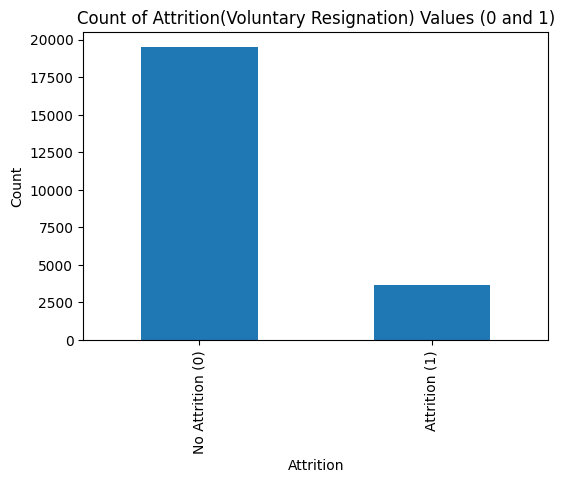

In [300]:
import matplotlib.pyplot as plt

attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar')

plt.title('Count of Attrition(Voluntary Resignation) Values (0 and 1)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Attrition (0)', 'Attrition (1)'])

plt.show()

In [301]:
corr= numeric.corr()

<Axes: >

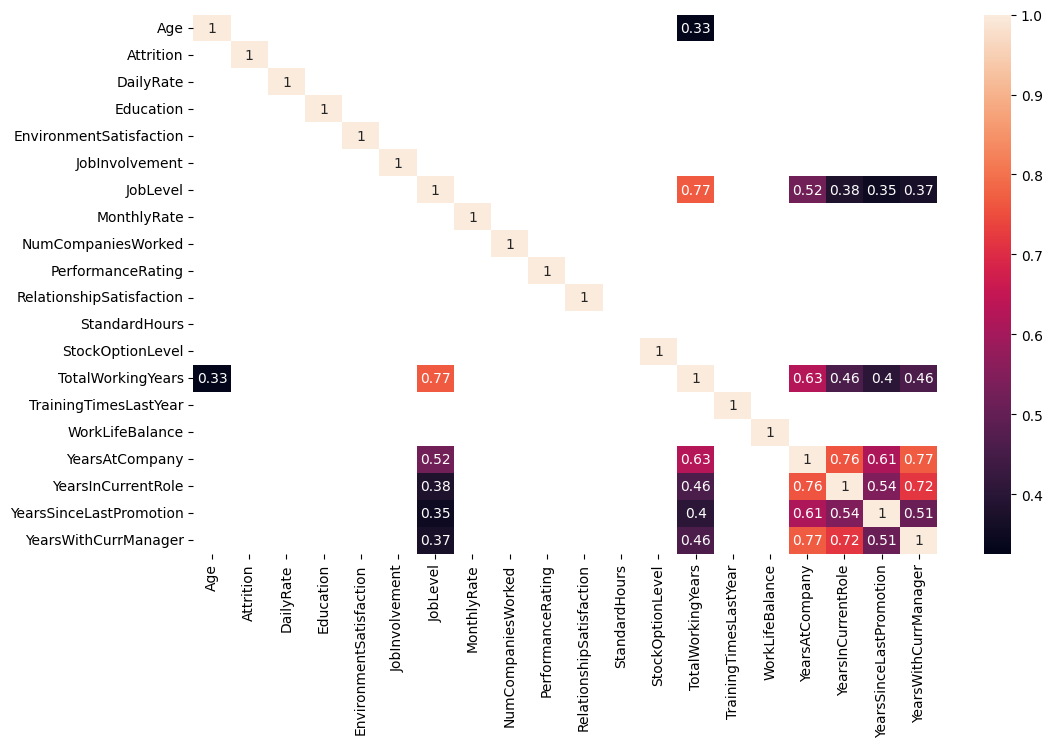

In [302]:
plt.subplots(figsize=[12,7])
sns.heatmap(corr,annot=True,mask=numeric.corr()<0.3)

<ipython-input-303-2a2c9bbee449>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)


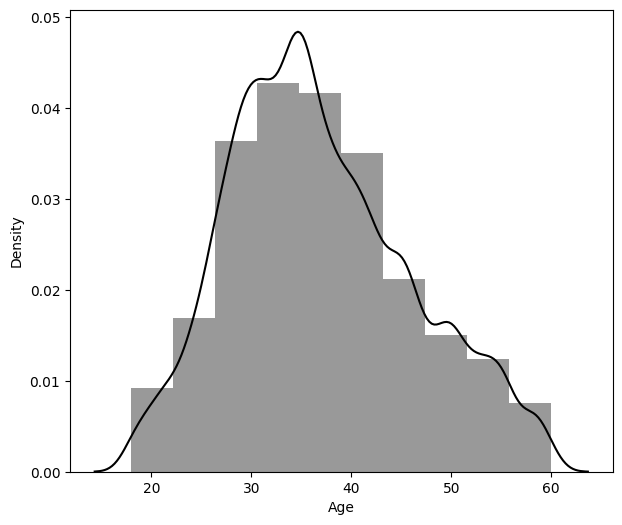

In [303]:
plt.figure(figsize=[7,6])
sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)

plt.show()

In [304]:
df['Age'].value_counts()

,count
Age,
35.0,1218
34.0,1210
36.0,1101
31.0,1079
29.0,1073
32.0,956
30.0,950
38.0,941
33.0,917


In [305]:
df.Attrition.value_counts()

,count
Attrition,
0,19530
1,3674


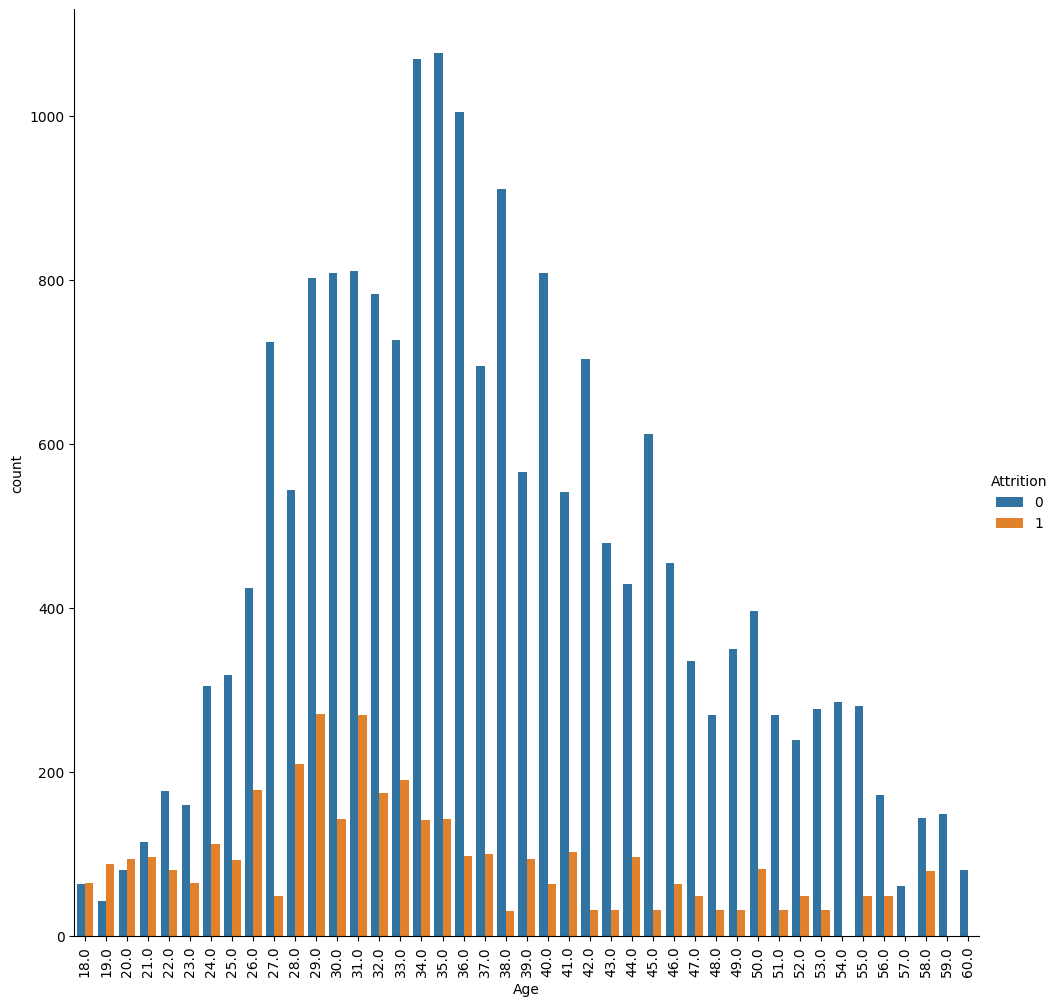

In [306]:
sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [307]:
df.EducationField.value_counts()

,count
EducationField,
Life Sciences,9578
Medical,7297
Marketing,2526
Technical Degree,2055
Other,1304
Human Resources,443
Test,1


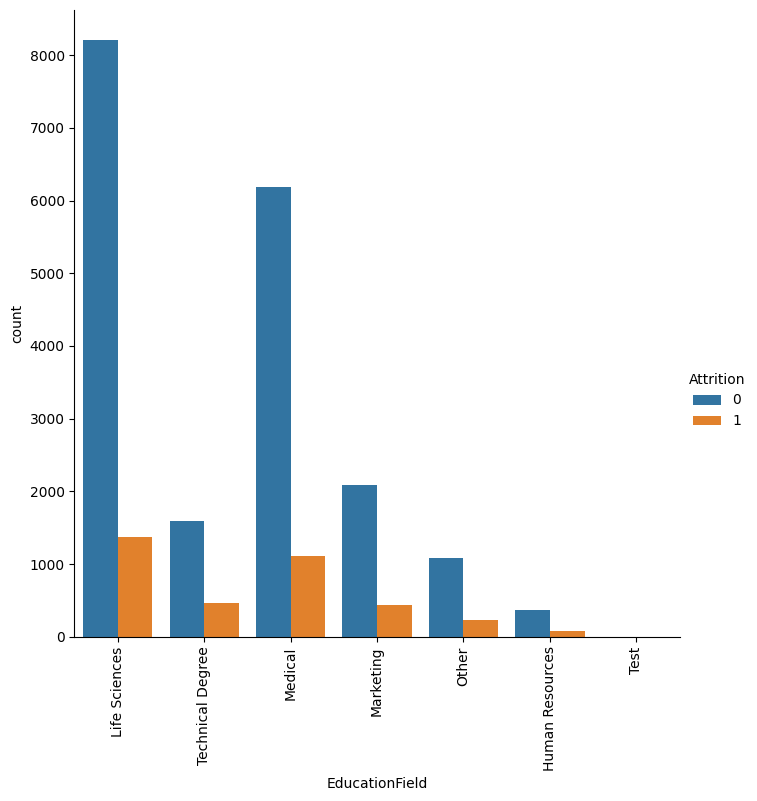

In [308]:
sns.catplot(x='EducationField',hue='Attrition',kind='count',data=df,height=7)
plt.xticks(rotation=90)

plt.show()

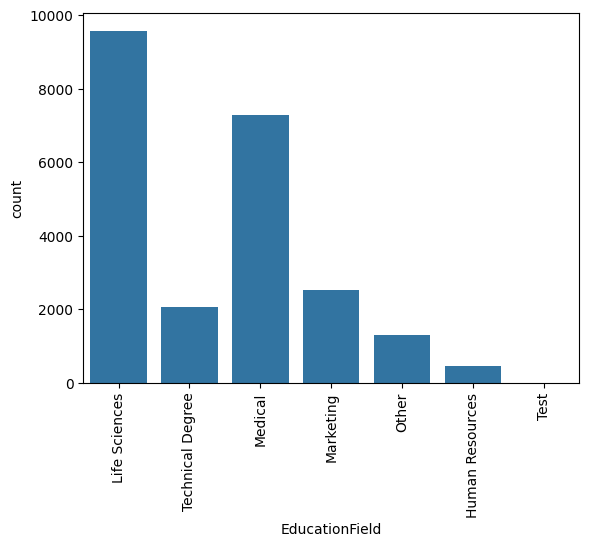

In [309]:
sns.countplot(x='EducationField',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [310]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [311]:
df['Education'].head()

,Education
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


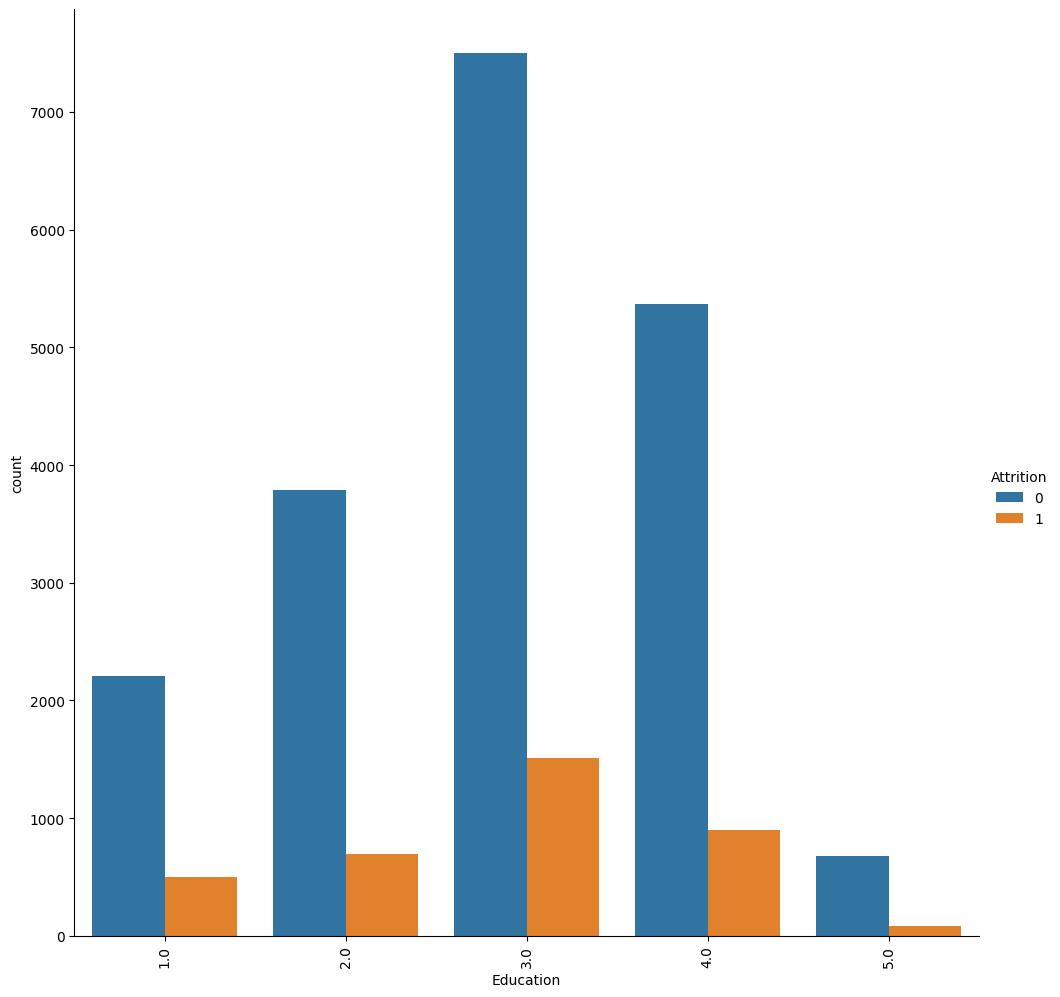

In [312]:
sns.catplot(x='Education',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

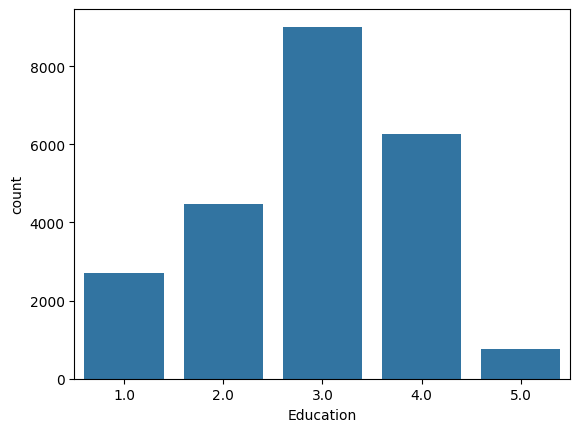

In [313]:
sns.countplot(x='Education', data=df)

plt.show()

In [314]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

<Axes: >

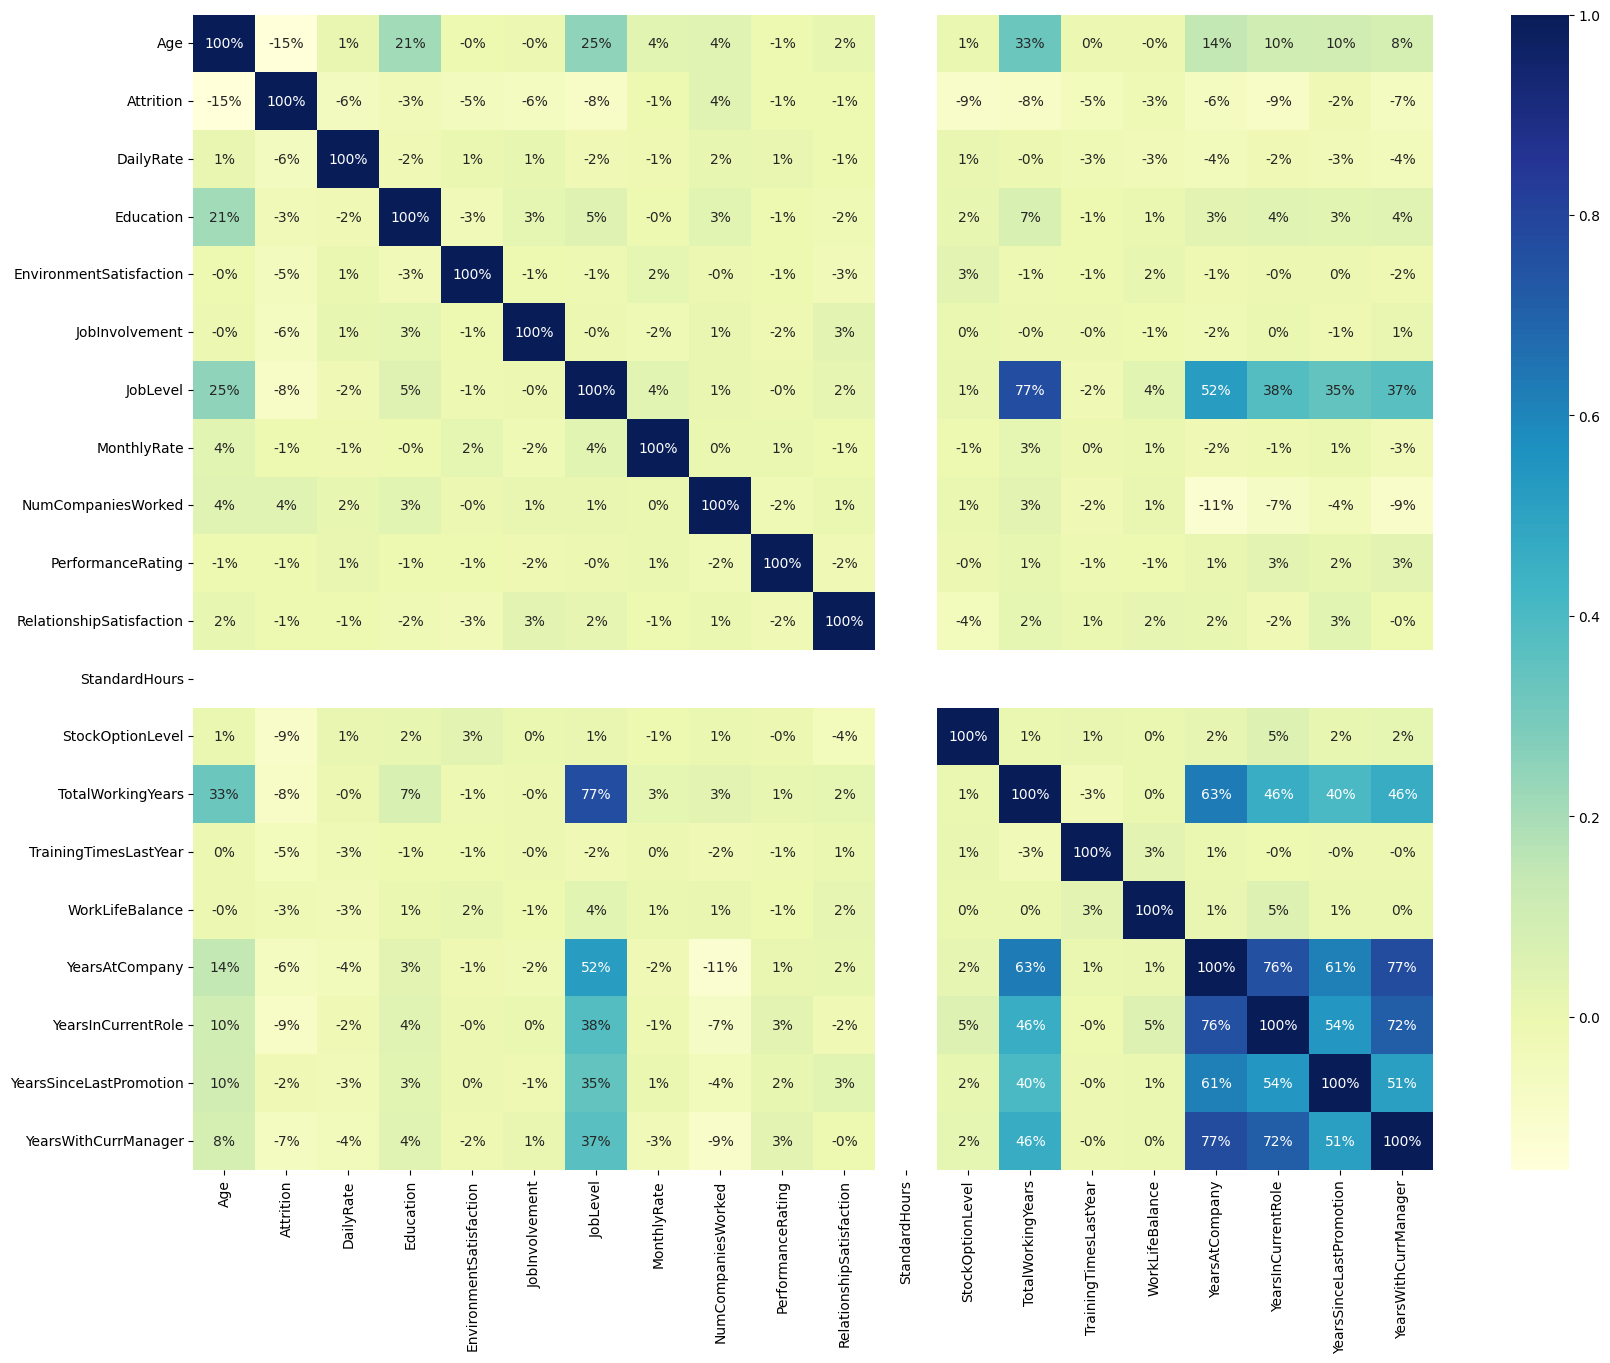

In [315]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

In [316]:
df=df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

In [317]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Application ID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [318]:
df.drop('Age',axis=1,inplace=True)

In [319]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Application ID,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123456,2.0,Female,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123458,2.0,Female,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123462,2.0,Female,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123463,2.0,Female,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123464,2.0,Female,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [320]:
df.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Application ID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [321]:
df.BusinessTravel.value_counts()

,count
BusinessTravel,
Travel_Rarely,16457
Travel_Frequently,4376
Non-Travel,2371


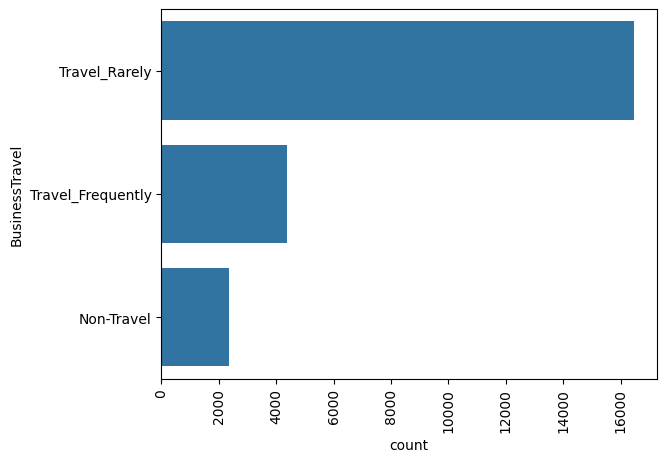

In [322]:
sns.countplot(y='BusinessTravel',data=df)
plt.xticks(rotation='vertical')
plt.show()

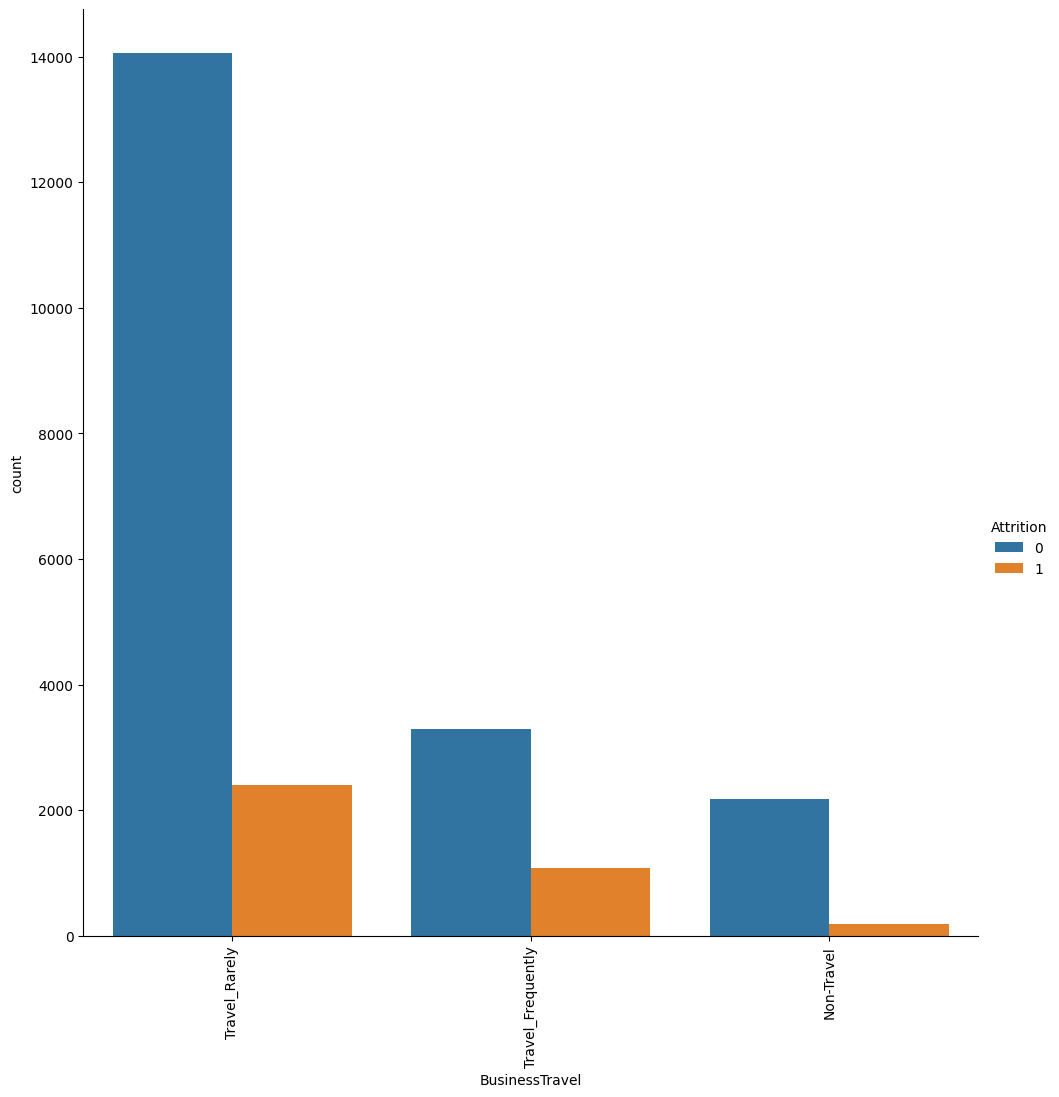

In [323]:
sns.catplot(x='BusinessTravel',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [324]:
df.Department.value_counts()

,count
Department,
Research & Development,15132
Sales,7059
Human Resources,1013


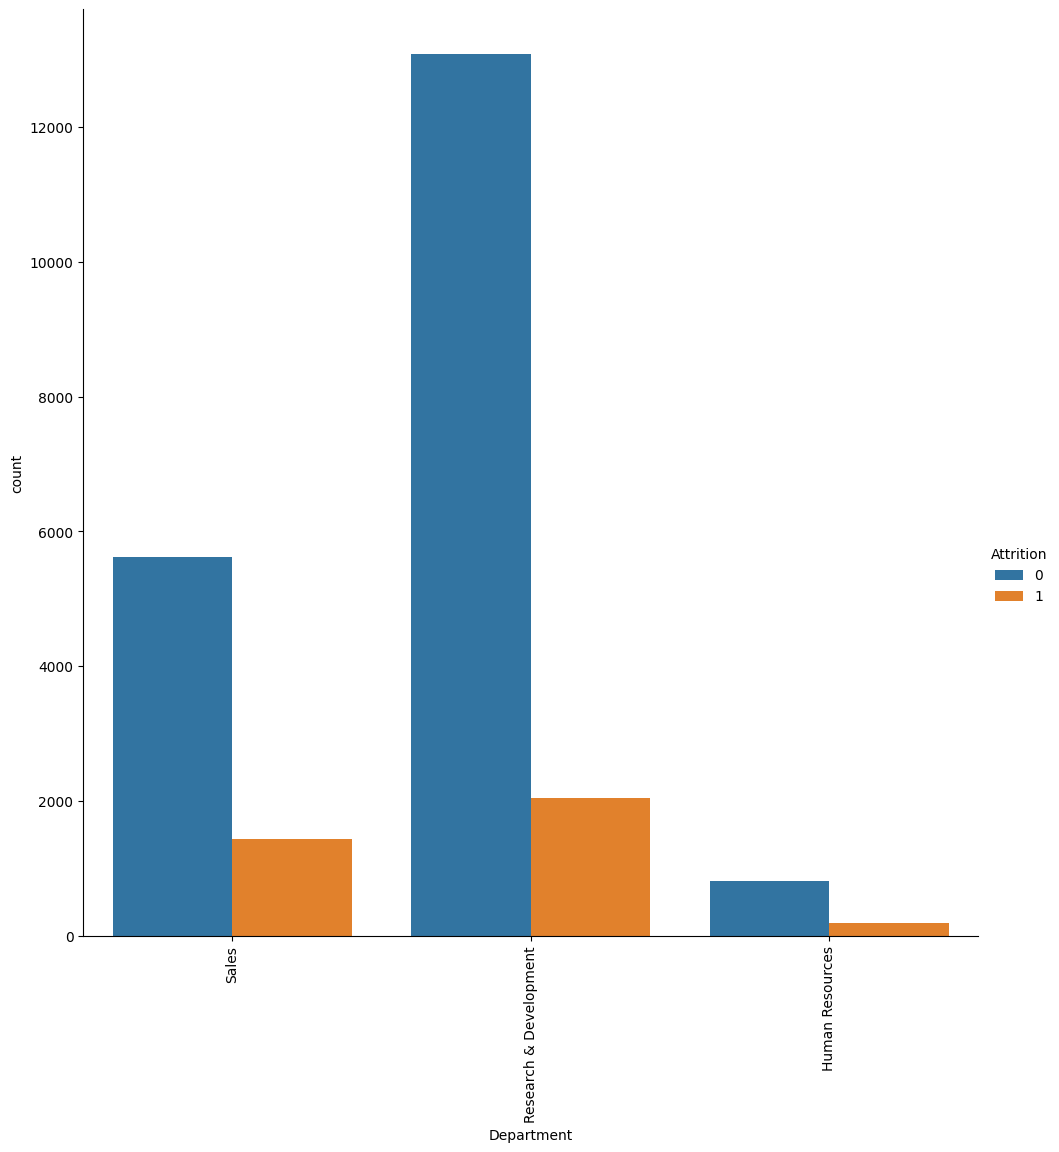

In [325]:
sns.catplot(x='Department',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [326]:
df.DistanceFromHome.value_counts()

,count
DistanceFromHome,
1,2383
2,2063
2.0,1239
3,1022
10,978
7,967
9,952
8,925
1.0,897


In [327]:
df.DistanceFromHome = pd.to_numeric(df.DistanceFromHome,errors='coerce')

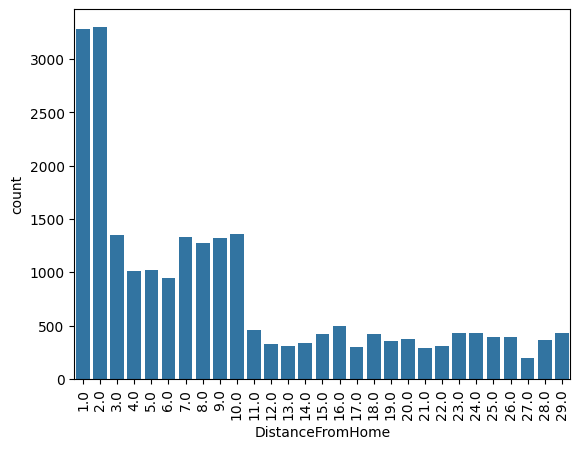

In [328]:
sns.countplot(x='DistanceFromHome',data=df)
plt.xticks(rotation='vertical')

plt.show()

In [329]:
df.DistanceFromHome.dtype

dtype('float64')

In [330]:
category.columns

Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'Application ID', 'Gender',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'Employee Source'],
      dtype='object')

In [331]:
df.EducationField.value_counts()

,count
EducationField,
Life Sciences,9578
Medical,7297
Marketing,2526
Technical Degree,2055
Other,1304
Human Resources,443
Test,1


In [332]:
def edufield(x):
    if  x=='Test':
        x='Other'
    return x

In [333]:
df.EducationField=df.EducationField.apply(edufield)

In [334]:
df.EducationField.value_counts()

,count
EducationField,
Life Sciences,9578
Medical,7297
Marketing,2526
Technical Degree,2055
Other,1305
Human Resources,443


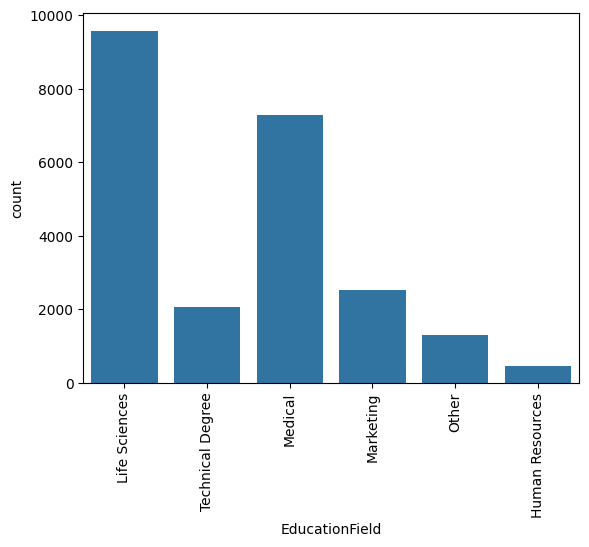

In [335]:

sns.countplot(x='EducationField',data=df)
plt.xticks(rotation='vertical')

plt.show()

In [336]:
df.Gender.value_counts()

,count
Gender,
Male,13914
Female,9290


In [337]:
def gender(x):
    if x=='Male':
        x=1
    elif x=='Female':
        x=0
    return x

In [338]:
df.Gender=df.Gender.apply(gender)
df.Gender = pd.to_numeric(df.Gender,errors='coerce')

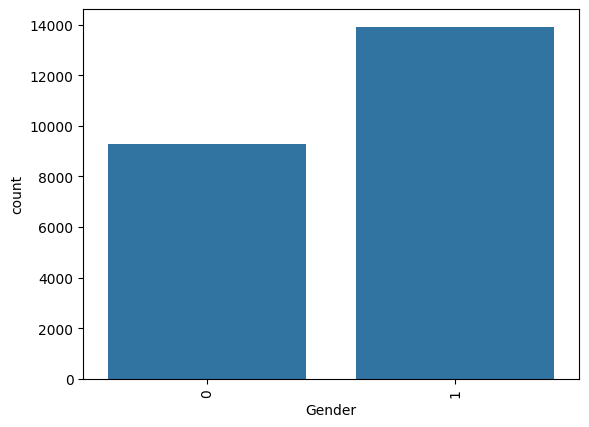

In [339]:
sns.countplot(x='Gender',data=df)
plt.xticks(rotation='vertical')

plt.show()

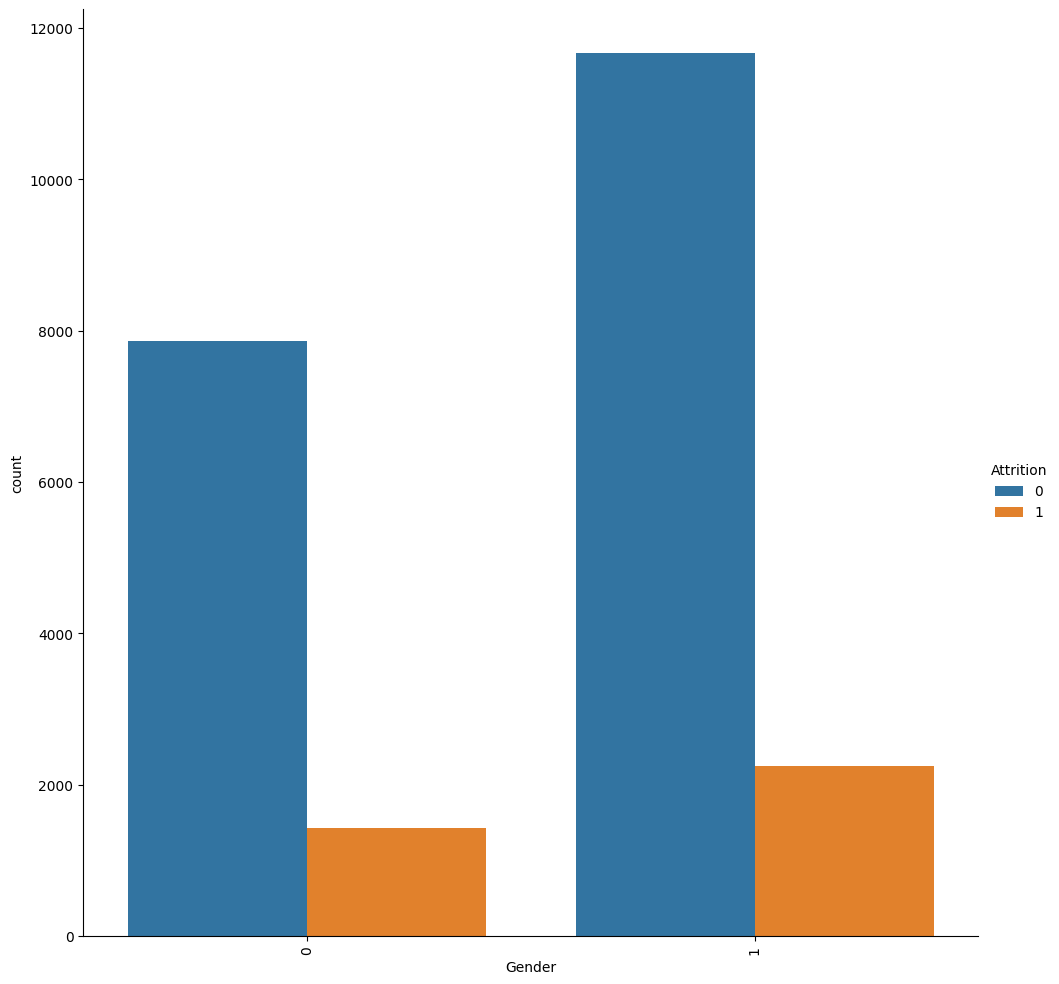

In [340]:
sns.catplot(x='Gender',hue='Attrition',data=df,kind='count',height=10) # Removed y='Attrition' as it's redundant for countplot with hue
plt.xticks(rotation=90)

plt.show()

In [341]:
df.HourlyRate.value_counts()
df.HourlyRate = pd.to_numeric(df.HourlyRate,errors='coerce')

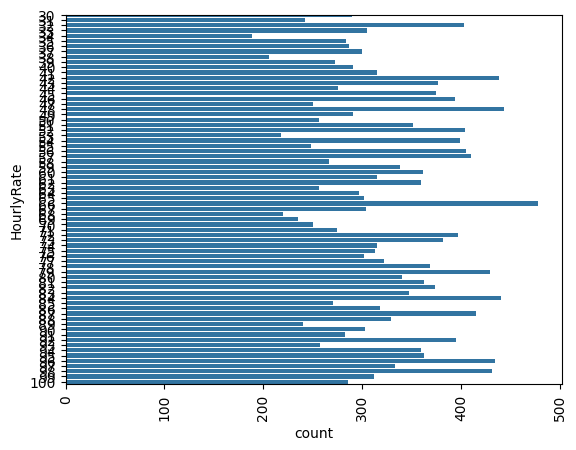

In [342]:
sns.countplot(y='HourlyRate', data=df, order=sorted(df['HourlyRate'].unique()))
plt.xticks(rotation='vertical')

y_min, y_max = plt.ylim()
plt.ylim(y_min, y_max * 0.001)

plt.show()

In [343]:
df.JobRole.value_counts()

,count
JobRole,
Sales Executive,5064
Research Scientist,4592
Laboratory Technician,4107
Manufacturing Director,2361
Healthcare Representative,2077
Manager,1585
Sales Representative,1299
Research Director,1281
Human Resources,838


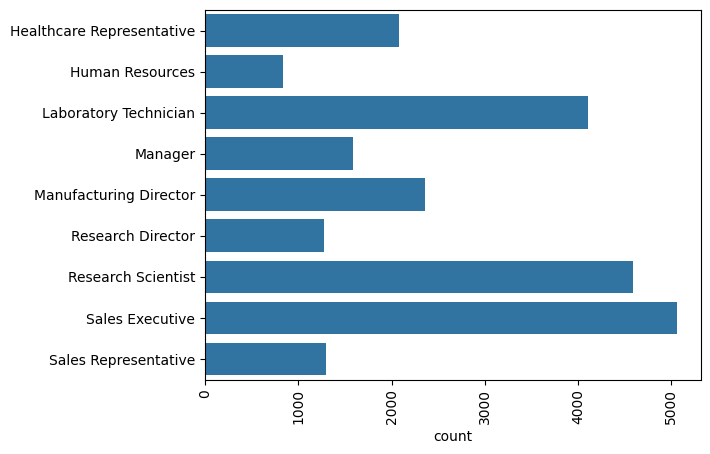

In [344]:
sns.countplot(sorted(df['JobRole']))
plt.xticks(rotation='vertical')

plt.show()

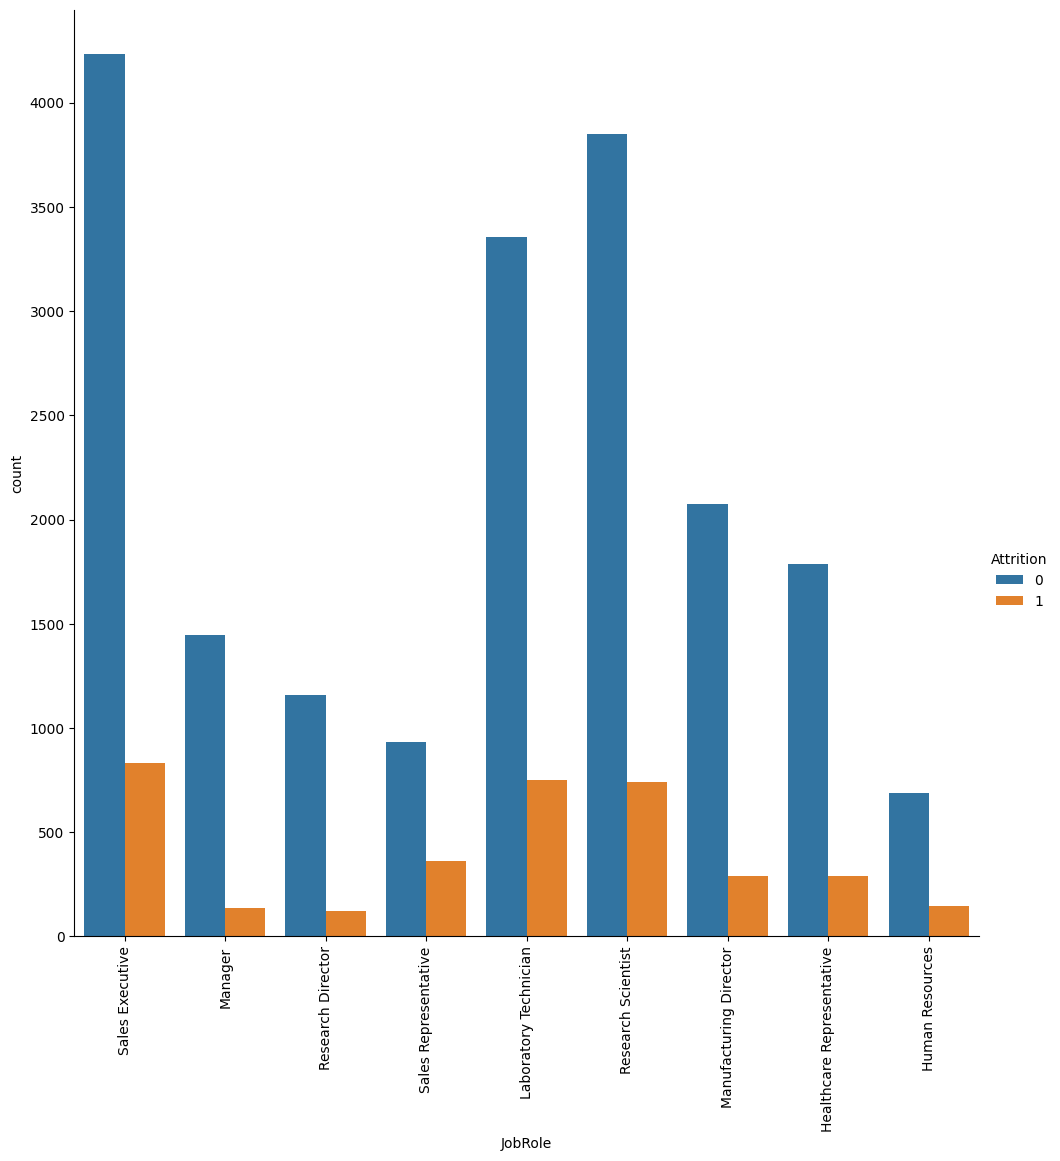

In [345]:
sns.catplot(x='JobRole',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [346]:
df.JobSatisfaction.value_counts()

,count
JobSatisfaction,
4,7216
3,7026
1,4560
2,4402


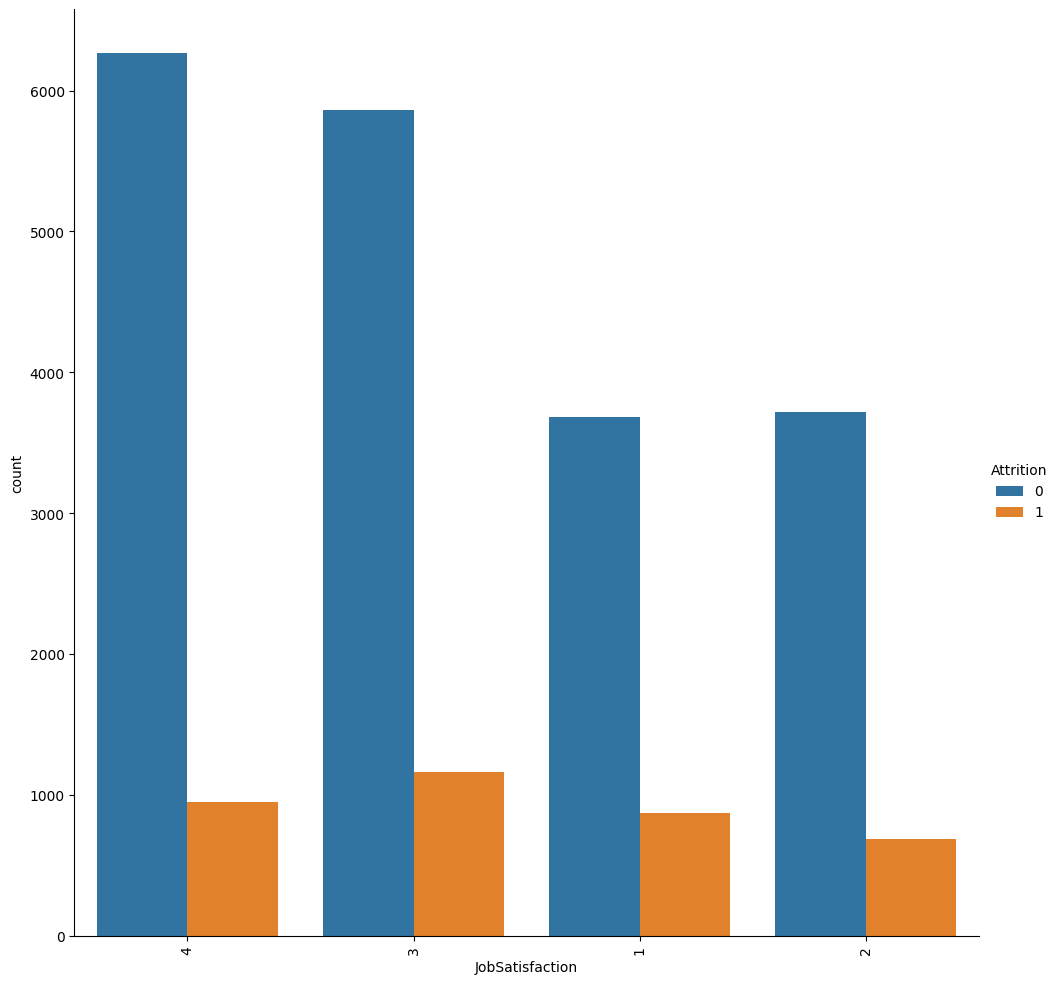

In [347]:
sns.catplot(x='JobSatisfaction',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [348]:
df.JobSatisfaction = pd.to_numeric(df.JobSatisfaction,errors='coerce')

In [349]:
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,10613
Single,7425
Divorced,5166


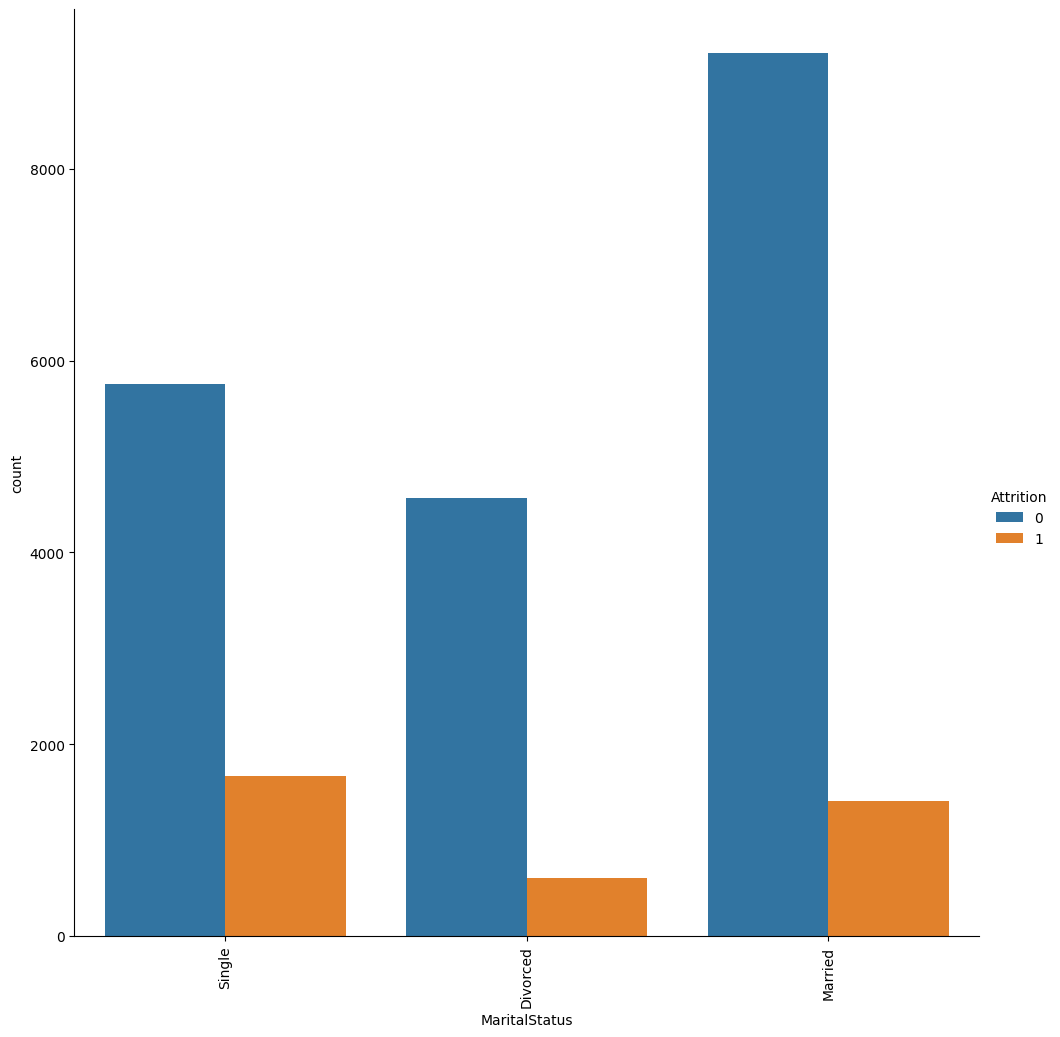

In [350]:
sns.catplot(x='MaritalStatus',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [351]:
df.MonthlyIncome.value_counts()

,count
MonthlyIncome,
2342,66
2559,54
5562,48
6347,48
2741,48
...,...
7260,8
2373,8
5980,8


In [352]:
df.MonthlyIncome = pd.to_numeric(df.MonthlyIncome,errors='coerce')

In [353]:
df.OverTime.value_counts()

,count
OverTime,
No,16633
Yes,6571


In [354]:
def overtime(x):
    if x=='Yes':
        x=1
    elif x=='No':
        x=0
    return x

In [355]:
df.OverTime=df.OverTime.apply(overtime)
df.OverTime = pd.to_numeric(df.OverTime,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23204 entries, 0 to 23432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 23204 non-null  int64  
 1   BusinessTravel            23204 non-null  object 
 2   DailyRate                 23204 non-null  float64
 3   Department                23204 non-null  object 
 4   DistanceFromHome          23204 non-null  float64
 5   Education                 23204 non-null  float64
 6   EducationField            23204 non-null  object 
 7   Application ID            23204 non-null  object 
 8   EnvironmentSatisfaction   23204 non-null  float64
 9   Gender                    23204 non-null  int64  
 10  HourlyRate                23204 non-null  int64  
 11  JobInvolvement            23204 non-null  float64
 12  JobLevel                  23204 non-null  float64
 13  JobRole                   23204 non-null  object 
 14  JobSatisfac

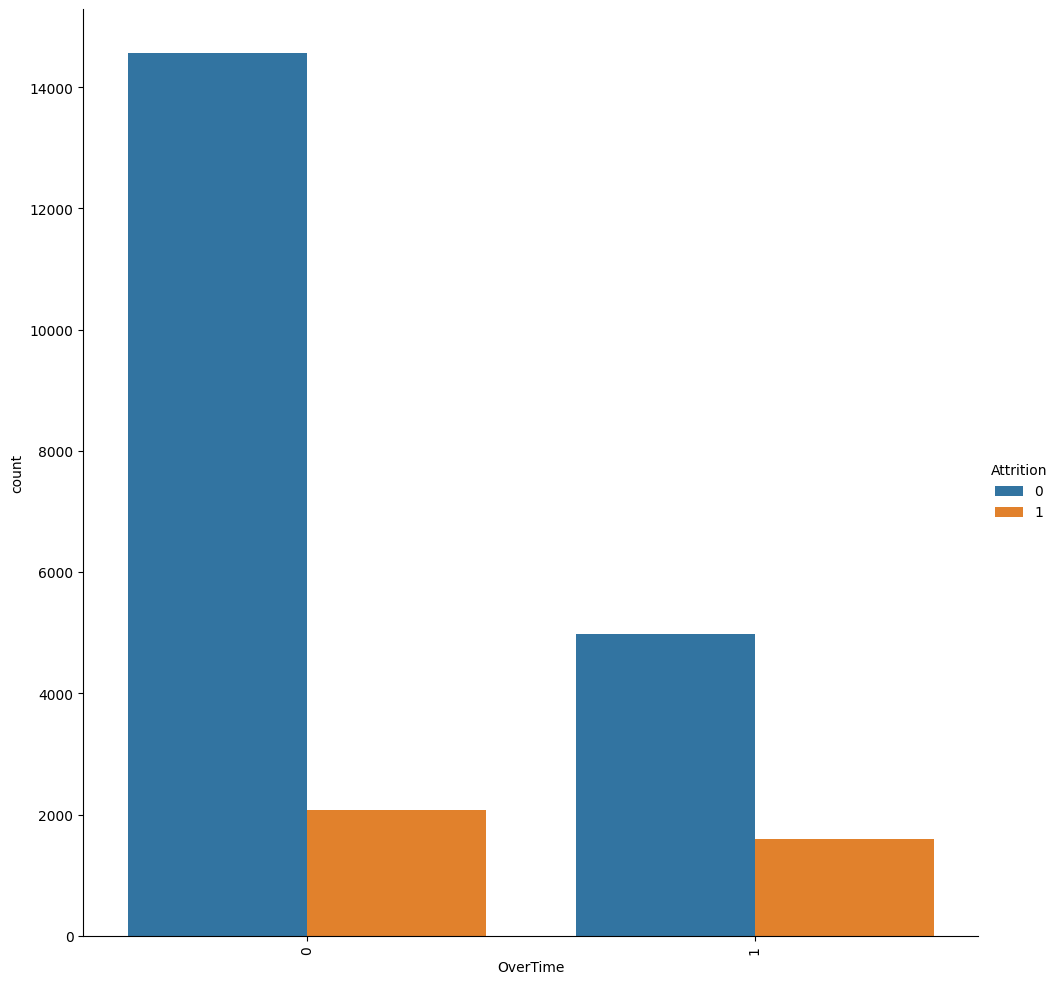

In [356]:
sns.catplot(x='OverTime',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [357]:
df.PercentSalaryHike.value_counts()
df.PercentSalaryHike = pd.to_numeric(df.PercentSalaryHike,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23204 entries, 0 to 23432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 23204 non-null  int64  
 1   BusinessTravel            23204 non-null  object 
 2   DailyRate                 23204 non-null  float64
 3   Department                23204 non-null  object 
 4   DistanceFromHome          23204 non-null  float64
 5   Education                 23204 non-null  float64
 6   EducationField            23204 non-null  object 
 7   Application ID            23204 non-null  object 
 8   EnvironmentSatisfaction   23204 non-null  float64
 9   Gender                    23204 non-null  int64  
 10  HourlyRate                23204 non-null  int64  
 11  JobInvolvement            23204 non-null  float64
 12  JobLevel                  23204 non-null  float64
 13  JobRole                   23204 non-null  object 
 14  JobSatisfac

In [358]:
df['Employee Source'].value_counts()

,count
Employee Source,
Company Website,5355
Seek,3648
Indeed,2507
Jora,2397
LinkedIn,2314
Recruit.net,2306
GlassDoor,2157
Adzuna,2103
Referral,416


In [359]:
def empsource(x):
    if x=='Test':
        x='Referral'
    return x
df['Employee Source']= df['Employee Source'].apply(empsource)

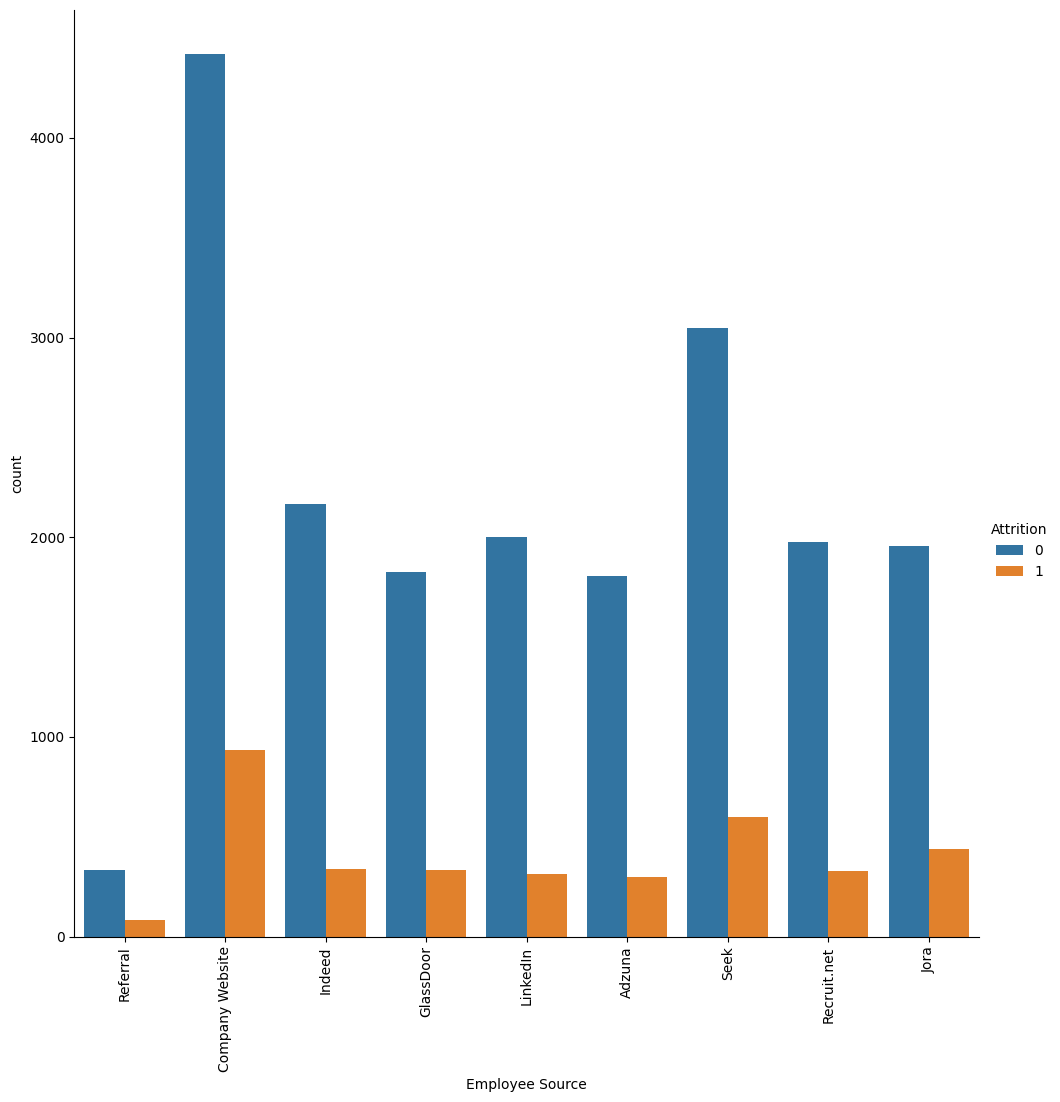

In [360]:
sns.catplot(x='Employee Source',hue='Attrition',data=df,kind='count',height=10)
plt.xticks(rotation=90)

plt.show()

In [361]:
df=df.drop(['Application ID'],axis=1)

In [362]:
df.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [363]:
df.Attrition.value_counts()

,count
Attrition,
0,19530
1,3674


In [364]:
df.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [365]:
dfn=df.copy()


In [366]:
df2=pd.get_dummies(df)
df2

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MaritalStatus_Single,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,...,True,False,False,False,False,False,False,False,True,False
1,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,...,True,False,False,False,False,False,False,False,True,False
2,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,...,True,False,False,False,False,False,False,False,True,False
3,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,...,True,False,False,False,False,False,False,False,True,False
4,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,0,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,...,False,False,True,False,False,False,False,False,False,False
23429,0,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,...,False,False,True,False,False,False,False,False,False,False
23430,0,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,...,False,False,True,False,False,False,False,False,False,False
23431,0,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,...,True,False,True,False,False,False,False,False,False,False


In [367]:
df2.to_csv('HR_Analyst_File.csv', index=False)

In [368]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [375]:
for col in dfn.columns:
    if dfn[col].dtype=='object':
        print(dfn[col].value_counts())
        print('*'*100)

BusinessTravel
Travel_Rarely        16457
Travel_Frequently     4376
Non-Travel            2371
Name: count, dtype: int64
****************************************************************************************************
Department
Research & Development    15132
Sales                      7059
Human Resources            1013
Name: count, dtype: int64
****************************************************************************************************
EducationField
Life Sciences       9578
Medical             7297
Marketing           2526
Technical Degree    2055
Other               1305
Human Resources      443
Name: count, dtype: int64
****************************************************************************************************
JobRole
Sales Executive              5064
Research Scientist           4592
Laboratory Technician        4107
Manufacturing Director       2361
Healthcare Representative    2077
Manager                      1585
Sales Representative         1299
Resea

In [376]:
for col in dfn.columns:
    if dfn[col].dtype=='int64' or dfn[col].dtype=='float64':
        print(dfn[col].value_counts())
        print('*'*100)

Attrition
0    19530
1     3674
Name: count, dtype: int64
****************************************************************************************************
DailyRate
691.0     99
408.0     80
1329.0    80
329.0     79
530.0     78
          ..
776.0     14
1387.0    14
573.0     14
1015.0    14
363.0     14
Name: count, Length: 883, dtype: int64
****************************************************************************************************
DistanceFromHome
2.0     3302
1.0     3280
10.0    1359
3.0     1346
7.0     1330
9.0     1325
8.0     1270
5.0     1023
4.0     1014
6.0      942
16.0     500
11.0     461
24.0     430
29.0     429
23.0     428
15.0     419
18.0     418
26.0     395
25.0     394
20.0     375
28.0     363
19.0     351
14.0     333
12.0     330
13.0     304
22.0     304
17.0     300
21.0     285
27.0     194
Name: count, dtype: int64
****************************************************************************************************
Education
3.0    9010
4.0  

In [377]:
dfn.drop('Attrition',axis=1,inplace=True)

In [378]:
dfnew=pd.get_dummies(dfn)
dfnew.shape

(23204, 57)

In [385]:
y=df.Attrition

In [384]:
df.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [379]:
dfn.to_csv('HR_Analyst_2.csv', index=False)

In [380]:
X=dfnew

In [381]:
X.shape,y.shape

((23204, 57), ())

In [386]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [387]:
from sklearn.ensemble  import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,max_depth=5,min_samples_split=10000)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5,
                       min_samples_split=10000, random_state=0)

In [388]:
#trainAccuracy
round(rf.score(X_train,y_train),2)

0.84

In [389]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf.predict(X_test) )
cm

array([[7770,    0],
       [1512,    0]])

In [394]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [396]:
#standard scalar
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
smote=SMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)
pd.Series(y_train_sm).value_counts()

,count
Attrition,
0,11760
1,11760


In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [445]:

lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()


models=[]
models.append(('LogisticRegression',lr))
models.append(('Random Forest Classifier',rf))
models.append(('Decision Tree',dt))
models.append(('GaussianNB',gnb))
models.append(('KNN',knn))
models.append(('SVM',svc))

results=[]
names=[]
ypred=[]
for name,model in models:
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print()
    print("*"*100)
    print()
    print("%s"%(name))
    print("Accuracy Score(%) : {}".format(accuracy_score(y_test,ypred)*100))
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



****************************************************************************************************

LogisticRegression
Accuracy Score(%) : 83.710407239819


****************************************************************************************************

Random Forest Classifier
Accuracy Score(%) : 99.61215255332903


****************************************************************************************************

Decision Tree
Accuracy Score(%) : 99.22430510665805


****************************************************************************************************

GaussianNB
Accuracy Score(%) : 77.36479207067443


****************************************************************************************************

KNN
Accuracy Score(%) : 94.26847662141779


****************************************************************************************************

SVM
Accuracy Score(%) : 83.710407239819

